In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

In [2]:
df = pd.read_csv('capstone_laptop.csv')

In [3]:
df.head(20)

,Taken_product,Yearly_avg_view_on_travel_page_code,Daily_Avg_mins_spend_on_traveling_page_code,montly_avg_comment_on_company_page_code,total_likes_on_outofstation_checkin_received_code,Yearly_avg_comment_on_travel_page_code,total_likes_on_outstation_checkin_given_code,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,week_since_last_outstation_checkin,following_company_page,working_flag,travelling_network_rating,Adult_flag
0,0,3,0,3,2,3,3,8,1,7,1,0,1,4,1
1,0,2,0,1,1,2,2,3,4,7,1,1,0,3,0
2,0,2,0,2,1,2,2,2,2,7,0,0,0,3,0
3,0,2,0,3,3,2,2,23,3,7,0,0,1,2,0
4,1,2,0,3,1,2,2,16,1,7,1,1,1,2,0
5,0,2,0,2,2,2,2,1,3,7,2,0,0,1,1
6,0,2,0,2,3,2,2,8,3,7,1,0,0,4,0
7,0,2,1,2,1,2,2,1,2,8,1,0,1,4,0
8,0,3,1,3,2,3,3,5,4,9,4,1,1,3,0
9,0,2,1,2,5,2,2,1,2,7,1,1,0,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Taken_product                                      1108 non-null   int64
 1   Yearly_avg_view_on_travel_page_code                1108 non-null   int64
 2   Daily_Avg_mins_spend_on_traveling_page_code        1108 non-null   int64
 3   montly_avg_comment_on_company_page_code            1108 non-null   int64
 4   total_likes_on_outofstation_checkin_received_code  1108 non-null   int64
 5   Yearly_avg_comment_on_travel_page_code             1108 non-null   int64
 6   total_likes_on_outstation_checkin_given_code       1108 non-null   int64
 7   yearly_avg_Outstation_checkins                     1108 non-null   int64
 8   member_in_family                                   1108 non-null   int64
 9   preferred_location_type       

# TRAIN TEST SPLIT 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df.shape

(1108, 15)

In [8]:
X = df.drop("Taken_product", axis=1)

y = df.pop("Taken_product")

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(775, 14)
(775,)
(333, 14)
(333,)


# model building

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt_model = DecisionTreeClassifier()

In [16]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

AUC: 1.000


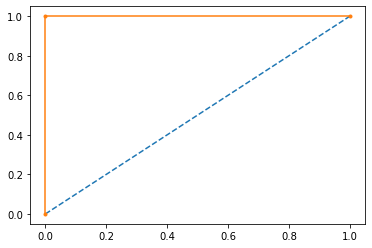

In [18]:
# AUC and ROC for the training data

# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.946


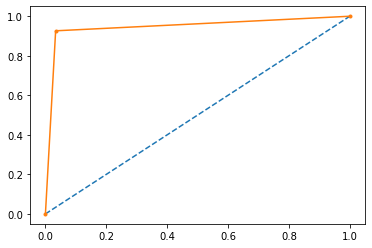

In [19]:
# AUC and ROC for the test data


# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_train, ytrain_predict))
print(confusion_matrix(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775

[[594   0]
 [  0 181]]


In [22]:
print(classification_report(y_test, ytest_predict))
print(confusion_matrix(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       238
           1       0.92      0.93      0.92        95

    accuracy                           0.95       333
   macro avg       0.94      0.95      0.94       333
weighted avg       0.96      0.95      0.96       333

[[230   8]
 [  7  88]]


In [23]:
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

1.0
0.954954954954955


# Randome Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfcl = RandomForestClassifier()
rfcl = rfcl.fit(X_train, y_train)

In [27]:
ytrain_predict_rf = rfcl.predict(X_train)
ytest_predict_rf = rfcl.predict(X_test)

In [28]:
rfcl.score(X_train,y_train)

1.0

AUC: 1.000


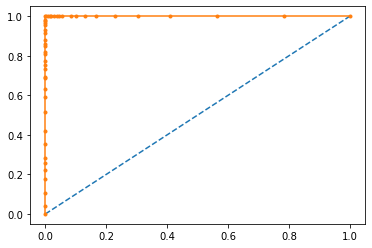

In [29]:
# AUC and ROC for the training data

# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.999


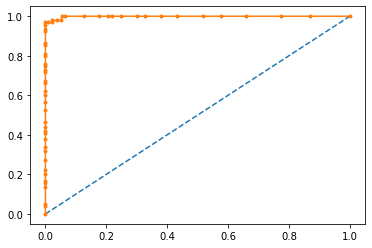

In [30]:
# AUC and ROC for the test data


# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [31]:
print(classification_report(y_train, ytrain_predict_rf))
print(confusion_matrix(y_train, ytrain_predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775

[[594   0]
 [  0 181]]


In [32]:
print(classification_report(y_test, ytest_predict_rf))
print(confusion_matrix(y_test, ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       238
           1       1.00      0.91      0.95        95

    accuracy                           0.97       333
   macro avg       0.98      0.95      0.97       333
weighted avg       0.97      0.97      0.97       333

[[238   0]
 [  9  86]]


In [33]:
print(rfcl.score(X_train,y_train))
print(rfcl.score(X_test,y_test))

1.0
0.972972972972973


# ANN

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
clf = MLPClassifier()
clf = clf.fit(X_train, y_train)

C:\Users\siddd\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
ytrain_predict_ann = clf.predict(X_train)
ytest_predict_ann = clf.predict(X_test)

In [38]:
clf.score(X_train,y_train)

0.9174193548387096

AUC: 0.939


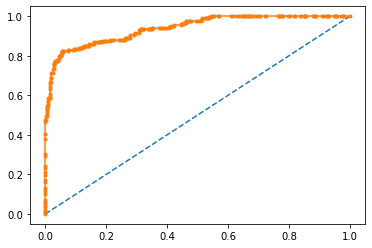

In [39]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.910


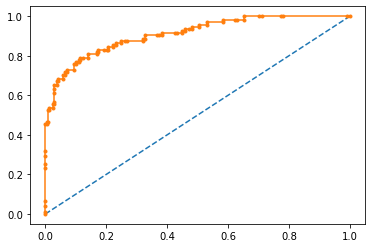

In [40]:
# AUC and ROC for the test data


# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [41]:
print(classification_report(y_train, ytrain_predict_ann))
print(confusion_matrix(y_train, ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       594
           1       0.91      0.71      0.80       181

    accuracy                           0.92       775
   macro avg       0.92      0.85      0.87       775
weighted avg       0.92      0.92      0.91       775

[[582  12]
 [ 52 129]]


In [42]:
print(classification_report(y_test, ytest_predict_ann))
print(confusion_matrix(y_test, ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       238
           1       0.84      0.68      0.76        95

    accuracy                           0.87       333
   macro avg       0.86      0.82      0.84       333
weighted avg       0.87      0.87      0.87       333

[[226  12]
 [ 30  65]]


In [43]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9174193548387096
0.8738738738738738


# Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)

C:\Users\siddd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
ytrain_predict_lr = lr.predict(X_train)
ytest_predict_lr = lr.predict(X_test)

In [48]:
lr.score(X_train,y_train)

0.8180645161290323

AUC: 0.799


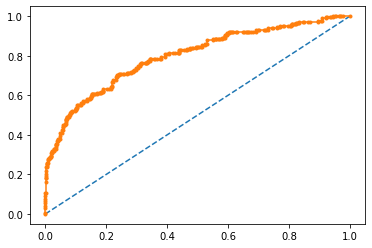

In [49]:
# AUC and ROC for the training data

# predict probabilities
probs = model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.838


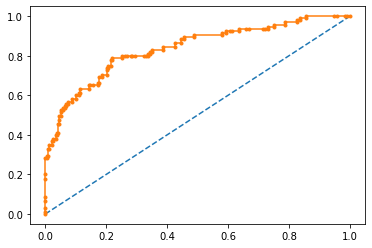

In [50]:
# AUC and ROC for the test data


# predict probabilities
probs = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [51]:
print(classification_report(y_train, ytrain_predict_lr))
print(confusion_matrix(y_train, ytrain_predict_lr))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       594
           1       0.70      0.38      0.49       181

    accuracy                           0.82       775
   macro avg       0.77      0.67      0.69       775
weighted avg       0.80      0.82      0.80       775

[[565  29]
 [112  69]]


In [52]:
print(classification_report(y_test, ytest_predict_lr))
print(confusion_matrix(y_test, ytest_predict_lr))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       238
           1       0.81      0.44      0.57        95

    accuracy                           0.81       333
   macro avg       0.81      0.70      0.73       333
weighted avg       0.81      0.81      0.79       333

[[228  10]
 [ 53  42]]


In [53]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8180645161290323
0.8108108108108109


 # Linear Discriminant Analysis

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [56]:
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, y_train)

In [57]:
print(model_lda.coef_, model_lda.intercept_)

[[-0.20511806 -0.14727124  0.08308819 -0.36674798 -0.20511806 -0.20511806
   0.04115476  0.03647689  0.13788064  0.19105427  1.6745216   0.0137484
  -0.338867   -0.82878698]] [-0.6823287]


In [58]:
ytrain_predict_lda = lda.predict(X_train)
ytest_predict_lda = lda.predict(X_test)

In [59]:
lda.score(X_train,y_train)

0.8206451612903226

AUC: 0.794


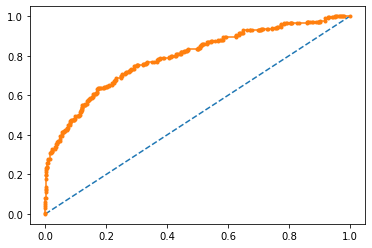

In [60]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.837


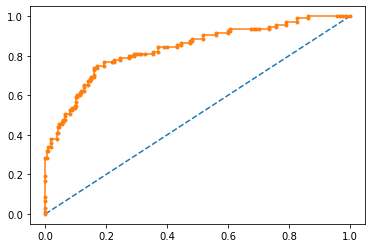

In [61]:
# AUC and ROC for the test data


# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [62]:
print(classification_report(y_train, ytrain_predict_lda))
print(confusion_matrix(y_train, ytrain_predict_lda))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       594
           1       0.71      0.39      0.51       181

    accuracy                           0.82       775
   macro avg       0.77      0.67      0.70       775
weighted avg       0.81      0.82      0.80       775

[[565  29]
 [110  71]]


In [63]:
print(classification_report(y_test, ytest_predict_lda))
print(confusion_matrix(y_test, ytest_predict_lda))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       238
           1       0.80      0.43      0.56        95

    accuracy                           0.81       333
   macro avg       0.81      0.69      0.72       333
weighted avg       0.81      0.81      0.79       333

[[228  10]
 [ 54  41]]


In [64]:
print(model_lda.score(X_train,y_train))
print(model_lda.score(X_test,y_test))

0.8206451612903226
0.8078078078078078
